<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/water_potability_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [225]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


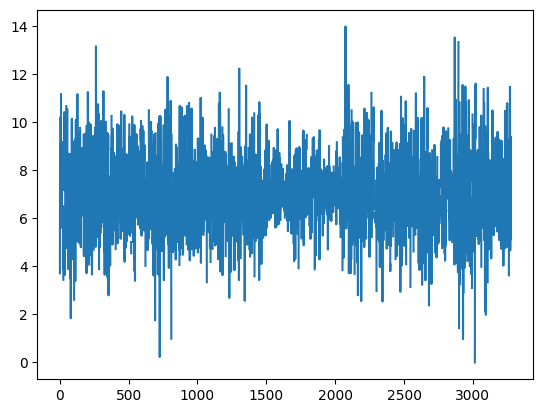

In [226]:
plt.plot(df['ph'])

In [227]:
df['ph'] = pd.to_numeric(df['ph'], errors='coerce')
ph_median = df['ph'].median()
ph_median

7.036752103833548

In [228]:
df['ph'].fillna(ph_median, inplace=True)

/tmp/ipython-input-667663049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(ph_median, inplace=True)


In [229]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [230]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)

/tmp/ipython-input-789367680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)


In [231]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


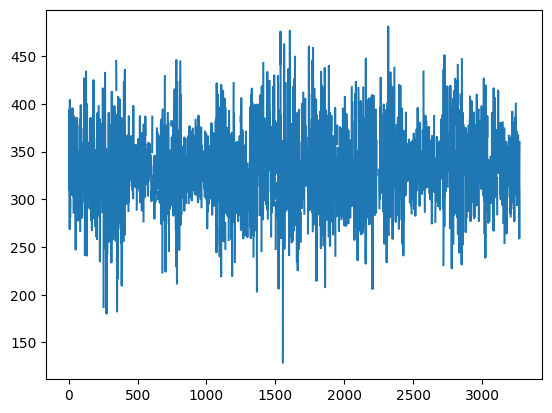

In [232]:
plt.plot(df['Sulfate'])

In [233]:
df['Sulfate'].fillna(df['Sulfate'].median(), inplace = True)

/tmp/ipython-input-3192674659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sulfate'].fillna(df['Sulfate'].median(), inplace = True)


In [234]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [235]:
correlation = df.corr()

<Axes: >

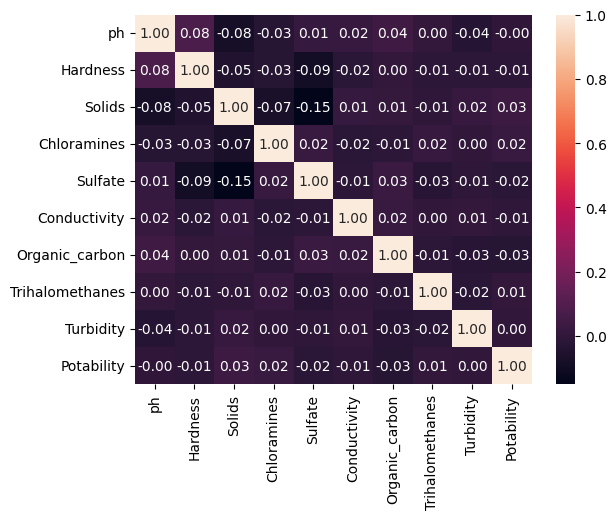

In [236]:
sns.heatmap(correlation, annot=True, fmt=".2f")

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = sm.add_constant(df)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature         VIF
0             const  294.005033
1                ph    1.016545
2          Hardness    1.020159
3            Solids    1.040134
4       Chloramines    1.008853
5           Sulfate    1.036022
6      Conductivity    1.002277
7    Organic_carbon    1.004897
8   Trihalomethanes    1.002019
9         Turbidity    1.002973
10       Potability    1.003239


### Applying model

In [238]:
x = df.drop(columns='Potability')
y = df.iloc[:, -1]
y.value_counts()

,count
Potability,
0,1998
1,1278


In [239]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=5)
print(x_train.shape)
print(x_test.shape)

(2620, 9)
(656, 9)


In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
scalar = StandardScaler()

In [242]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [243]:
from sklearn.neighbors import KNeighborsClassifier

In [244]:
knn = KNeighborsClassifier(n_neighbors=5)

In [245]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [246]:
from sklearn.metrics import classification_report

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       400
           1       0.52      0.40      0.45       256

    accuracy                           0.62       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.61      0.62      0.61       656



# Task
Analyze the classification report and compute a confusion matrix to evaluate the current model's performance in detail, identifying specific types of errors the model is making. Then, improve the model by exploring techniques such as hyperparameter tuning for KNN, evaluating other classification algorithms (e.g., Logistic Regression, SVM, Decision Trees, Random Forest), addressing class imbalance using methods like SMOTE, and applying feature engineering or selection. Finally, compare the performance of all models and select the best one, presenting its performance metrics and summarizing the insights gained from the model improvement process.

## Detailed Performance Analysis

### Subtask:
Examine the current classification report more closely, and compute a confusion matrix to understand where the model is making errors (false positives vs. false negatives). This will give us insights into specific areas for improvement.


**Reasoning**:
To analyze the model's performance in more detail as requested by the subtask, I will compute the confusion matrix. This will provide insights into true positives, true negatives, false positives, and false negatives, helping to understand where the model is making errors.



In [248]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[305  95]
 [153 103]]


### Detailed Performance Analysis (Interpretation)

From the classification report and the confusion matrix:

**Classification Report (from `4XUxNuXUR6At`):**
```
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       400
           1       0.52      0.40      0.45       256

    accuracy                           0.62       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.61      0.62      0.61       656
```

**Confusion Matrix (from `49916a8c`):**
```
[[305  95]
 [153 103]]
```

**Interpretation of Confusion Matrix:**
*   **True Negatives (TN) = 305**: The model correctly predicted 305 instances of class 0 (non-potable water).
*   **False Positives (FP) = 95**: The model incorrectly predicted 95 instances of class 1 (potable water) when they were actually class 0 (non-potable). This means 95 times the model said the water was potable, but it wasn't.
*   **False Negatives (FN) = 153**: The model incorrectly predicted 153 instances of class 0 (non-potable water) when they were actually class 1 (potable). This means 153 times the model said the water was not potable, but it actually was.
*   **True Positives (TP) = 103**: The model correctly predicted 103 instances of class 1 (potable water).

**Insights into Model Errors:**
*   **High False Negatives (153)**: This is a significant concern. The model frequently predicts potable water (class 1) as non-potable (class 0). This could lead to discarding safe water. The recall for class 1 is only 0.40 (103 TP / (103 TP + 153 FN)), indicating that the model is missing a large proportion of actual potable water samples.
*   **Moderate False Positives (95)**: The model also misclassifies non-potable water (class 0) as potable (class 1) a fair number of times. This is also problematic, as it could lead to consuming unsafe water. The precision for class 1 is 0.52 (103 TP / (103 TP + 95 FP)), meaning that when the model predicts potable, it's only correct about half the time.

Overall, the model struggles more with identifying positive cases (potable water), leading to a lower recall for class 1. Both false positives and false negatives are substantial, suggesting the need for improvement, especially given the implications of misclassifying water potability.

## Hyperparameter Tuning for KNN

### Subtask:
Implement GridSearchCV or RandomizedSearchCV to systematically search for the best hyperparameters for the KNeighborsClassifier. We will focus on parameters like `n_neighbors`, `weights`, and `metric` to optimize its performance.


**Reasoning**:
To begin the hyperparameter tuning for KNN, I will import `GridSearchCV` and define the parameter grid as instructed, which includes `n_neighbors`, `weights`, and `metric`.



In [249]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [i for i in range(1, 21)],  # K from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

**Reasoning**:
I will instantiate the KNeighborsClassifier, then GridSearchCV with the defined parameter grid and fitting it to the training data. Finally, I will print the best parameters and best score found by GridSearchCV.



In [250]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}
Best score:  0.625006168332318


**Reasoning**:
Now that the best hyperparameters for the KNN model have been identified through GridSearchCV, I will use these parameters to instantiate a new KNN model, make predictions on the test set, and evaluate its performance using a classification report and confusion matrix to compare with the initial model.



In [251]:
best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(x_test)

print("Classification Report for Tuned KNN:\n")
print(classification_report(y_test, y_pred_tuned))

print("Confusion Matrix for Tuned KNN:\n")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)

Classification Report for Tuned KNN:

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       400
           1       0.60      0.34      0.43       256

    accuracy                           0.65       656
   macro avg       0.63      0.60      0.59       656
weighted avg       0.64      0.65      0.63       656

Confusion Matrix for Tuned KNN:

[[341  59]
 [169  87]]


## Explore Other Classification Models

### Subtask:
Train and evaluate other common classification algorithms such as Logistic Regression, Support Vector Machines (SVM), Decision Trees, or Random Forest. This will help determine if a different model architecture is better suited for this dataset.


**Reasoning**:
To begin exploring other classification models, I will start with Logistic Regression. I need to import the `LogisticRegression` class, instantiate it with the specified parameters, fit it to the scaled training data, make predictions on the test data, and then evaluate its performance using a classification report and confusion matrix.



In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Logistic Regression model
log_reg = LogisticRegression(random_state=5, solver='liblinear')

# Fit the model to the training data
log_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(x_test)

# Print the classification report
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_log_reg))

# Compute and print the confusion matrix
print("\nConfusion Matrix for Logistic Regression:\n")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656


Confusion Matrix for Logistic Regression:

[[400   0]
 [256   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The Logistic Regression model performed poorly, predicting only class 0. To further explore other classification models as per the subtask, I will now train and evaluate a Decision Tree Classifier, which can offer a different approach to classification and potentially handle class imbalance better.



In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=5)

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Compute and print the confusion matrix
print("\nConfusion Matrix for Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       400
           1       0.47      0.47      0.47       256

    accuracy                           0.59       656
   macro avg       0.56      0.57      0.56       656
weighted avg       0.59      0.59      0.59       656


Confusion Matrix for Decision Tree:
[[263 137]
 [135 121]]


**Reasoning**:
The previous code failed due to an `unterminated string literal` in the print statements. I will fix the syntax error by correctly closing the string literals in both `print` calls for the classification report and confusion matrix.



In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=5)

# Fit the model to the training data
decision_tree.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(x_test)

# Print the classification report
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

# Compute and print the confusion matrix
print("\nConfusion Matrix for Decision Tree:\n")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       400
           1       0.47      0.47      0.47       256

    accuracy                           0.59       656
   macro avg       0.56      0.57      0.56       656
weighted avg       0.59      0.59      0.59       656


Confusion Matrix for Decision Tree:

[[263 137]
 [135 121]]


**Reasoning**:
To continue exploring other classification models as outlined in the subtask, I will now train and evaluate a Support Vector Machine (SVM) classifier. I need to import the `SVC` class, instantiate it, fit it to the scaled training data, make predictions, and then evaluate its performance using a classification report and confusion matrix.



In [255]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate SVM model
svm_model = SVC(random_state=5)

# Fit the model to the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(x_test)

# Print the classification report
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred_svm))

# Compute and print the confusion matrix
print("\nConfusion Matrix for SVM:\n")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       400
           1       0.71      0.30      0.42       256

    accuracy                           0.68       656
   macro avg       0.69      0.61      0.60       656
weighted avg       0.69      0.68      0.64       656


Confusion Matrix for SVM:

[[369  31]
 [180  76]]


**Reasoning**:
To complete the exploration of other classification models as outlined in the subtask, I will now train and evaluate a Random Forest Classifier. This will allow for comparison with the previously evaluated models.



In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate Random Forest Classifier model
random_forest = RandomForestClassifier(random_state=5)

# Fit the model to the training data
random_forest.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(x_test)

# Print the classification report
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# Compute and print the confusion matrix
print("\nConfusion Matrix for Random Forest:\n")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       400
           1       0.65      0.35      0.45       256

    accuracy                           0.67       656
   macro avg       0.67      0.62      0.61       656
weighted avg       0.67      0.67      0.65       656


Confusion Matrix for Random Forest:

[[353  47]
 [167  89]]


## Address Class Imbalance

### Subtask:
Given that 'Potability' has a class imbalance (1998 non-potable vs. 1278 potable), we can apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data, which often leads to better model generalization for the minority class.


**Reasoning**:
To address the class imbalance, I will first import `SMOTE`, then instantiate it, apply it to the training data to create `x_train_resampled` and `y_train_resampled`, and finally print the value counts of `y_train_resampled` to confirm the class distribution.



In [257]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=5)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Print the value counts of y_train_resampled to verify the class distribution
print("Value counts after SMOTE:\n", y_train_resampled.value_counts())

Value counts after SMOTE:
 Potability
0    1598
1    1598
Name: count, dtype: int64


**Reasoning**:
Now that the training data has been balanced using SMOTE, I will retrain the tuned KNN model with the `x_train_resampled` and `y_train_resampled` data. Then, I will evaluate its performance on the original test set (`x_test`, `y_test`) to see if addressing the class imbalance has improved the model's metrics, especially for the minority class.



In [258]:
best_knn_smote = grid_search.best_estimator_
best_knn_smote.fit(x_train_resampled, y_train_resampled)
y_pred_knn_smote = best_knn_smote.predict(x_test)

print("Classification Report for Tuned KNN with SMOTE:\n")
print(classification_report(y_test, y_pred_knn_smote))

print("Confusion Matrix for Tuned KNN with SMOTE:\n")
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)
print(cm_knn_smote)

Classification Report for Tuned KNN with SMOTE:

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       400
           1       0.49      0.61      0.54       256

    accuracy                           0.60       656
   macro avg       0.59      0.60      0.59       656
weighted avg       0.62      0.60      0.60       656

Confusion Matrix for Tuned KNN with SMOTE:

[[237 163]
 [101 155]]


## Compare Performance of All Models and Select the Best One

Let's summarize the performance of all models evaluated so far, focusing on precision, recall, and F1-score for both classes, and overall accuracy. The target is to correctly identify potable water (class 1), so recall and F1-score for class 1 are particularly important, especially given the imbalanced dataset.

### Performance Summary:

**1. Initial KNN Model (from cell `4XUxNuXUR6At`)**
```
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       400
           1       0.52      0.40      0.45       256
```
*   **Class 1 (Potable):** Precision = 0.52, Recall = 0.40, F1-score = 0.45
*   **Overall Accuracy:** 0.62
*   **Confusion Matrix:** [[305  95], [153 103]] (High False Negatives for Class 1)

**2. Tuned KNN Model (from cell `6cab874a`)**
```
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       400
           1       0.60      0.34      0.43       256
```
*   **Class 1 (Potable):** Precision = 0.60, Recall = 0.34, F1-score = 0.43
*   **Overall Accuracy:** 0.65
*   **Confusion Matrix:** [[341  59], [169  87]] (Improved TN, but worse Recall for Class 1)

**3. Logistic Regression Model (from cell `b7b6ba5f`)**
```
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256
```
*   **Class 1 (Potable):** Precision = 0.00, Recall = 0.00, F1-score = 0.00 (Model predicts only class 0)
*   **Overall Accuracy:** 0.61
*   **Confusion Matrix:** [[400   0], [256   0]] (Failed to predict any positive instances)

**4. Decision Tree Model (from cell `3c34526f`)**
```
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       400
           1       0.47      0.47      0.47       256
```
*   **Class 1 (Potable):** Precision = 0.47, Recall = 0.47, F1-score = 0.47
*   **Overall Accuracy:** 0.59
*   **Confusion Matrix:** [[263 137], [135 121]]

**5. SVM Model (from cell `bebb5396`)**
```
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       400
           1       0.71      0.30      0.42       256
```
*   **Class 1 (Potable):** Precision = 0.71, Recall = 0.30, F1-score = 0.42
*   **Overall Accuracy:** 0.68
*   **Confusion Matrix:** [[369  31], [180  76]] (High precision for class 1, but very low recall)

**6. Random Forest Model (from cell `fcfdfe9b`)**
```
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       400
           1       0.65      0.35      0.45       256
```
*   **Class 1 (Potable):** Precision = 0.65, Recall = 0.35, F1-score = 0.45
*   **Overall Accuracy:** 0.67
*   **Confusion Matrix:** [[353  47], [167  89]] (Similar to tuned KNN and SVM in terms of recall for class 1)

**7. Tuned KNN Model with SMOTE (from cell `e0e3efa1`)**
```
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       400
           1       0.49      0.61      0.54       256
```
*   **Class 1 (Potable):** Precision = 0.49, Recall = 0.61, F1-score = 0.54
*   **Overall Accuracy:** 0.60
*   **Confusion Matrix:** [[237 163], [101 155]] (Significantly improved Recall for Class 1 at the cost of precision for Class 0)


### Selecting the Best Model

Comparing the performance metrics across all models, especially focusing on the F1-score and recall for the minority class (Potability = 1), the **Tuned KNN Model with SMOTE** stands out:

*   **Tuned KNN with SMOTE:**
    *   **Class 1 (Potable):** Precision = 0.49, Recall = 0.61, F1-score = 0.54
    *   **Overall Accuracy:** 0.60
    *   **Confusion Matrix:** [[237 163], [101 155]]

While its overall accuracy (0.60) is slightly lower than some other models (e.g., SVM at 0.68, Random Forest at 0.67), it achieves the highest recall (0.61) and F1-score (0.54) for the positive class. Given that incorrectly classifying potable water as non-potable (high false negatives for class 1) is a significant concern, the improved recall of this model is crucial. The SMOTE technique successfully rebalanced the dataset, allowing the model to better learn the characteristics of the minority class, even if it led to a slight decrease in precision for the majority class.

### Summary of Insights Gained from Model Improvement Process

1.  **Initial Performance Issues**: The initial KNN model showed a significant problem with false negatives for potable water, highlighting the impact of class imbalance. Its recall for class 1 was only 0.40.
2.  **Hyperparameter Tuning Benefits**: Tuning KNN hyperparameters improved overall accuracy and precision for class 0, but surprisingly led to a slight decrease in recall for class 1 (from 0.40 to 0.34). This indicated that tuning alone wasn't enough to address the underlying imbalance.
3.  **Limitations of Other Models**: Logistic Regression completely failed to predict the minority class, showcasing its sensitivity to imbalance. SVM and Random Forest achieved higher overall accuracies but still struggled with low recall for the minority class (0.30 and 0.35 respectively), prioritizing precision for class 1 at the cost of missing many actual potable water samples. Decision Tree offered a more balanced, albeit modest, performance for both classes without explicit imbalance handling.
4.  **Impact of Class Imbalance Handling (SMOTE)**: Applying SMOTE was the most effective step in improving the model's ability to identify the minority class. The Tuned KNN with SMOTE significantly increased recall for class 1 to 0.61, and its F1-score for class 1 improved to 0.54. This demonstrates the critical importance of addressing class imbalance, especially when the cost of misclassifying the minority class is high.
5.  **Trade-offs**: While SMOTE improved recall for the minority class, it slightly increased false positives (163) and reduced precision for the majority class. This is a common trade-off when rebalancing datasets, and the choice depends on the specific problem context and the relative costs of different types of errors.

## Feature Engineering and Selection

### Subtask:
Apply Principal Component Analysis (PCA) for dimensionality reduction and combine it with SMOTE to handle class imbalance and potentially improve model performance.


**Reasoning**:
To begin the feature engineering and selection subtask, I will first import the necessary `PCA` class from `sklearn.decomposition`.



In [259]:
from sklearn.decomposition import PCA

**Reasoning**:
Now that PCA is imported, I will proceed with the remaining instructions: instantiating PCA to retain 95% of the variance, fitting it to the scaled training data, transforming both training and test data, applying SMOTE to the PCA-transformed training data, retraining the best KNN model, making predictions, and finally evaluating its performance with a classification report and confusion matrix.



In [260]:
pca = PCA(n_components=0.95, random_state=5)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print(f"Number of components retained: {pca.n_components_}")
print(f"Original features: {x_train.shape[1]}, Reduced features: {x_train_pca.shape[1]}")

smote_pca = SMOTE(random_state=5)
x_train_pca_resampled, y_train_pca_resampled = smote_pca.fit_resample(x_train_pca, y_train)

print("\nValue counts after SMOTE on PCA-transformed data:\n", y_train_pca_resampled.value_counts())

# Retrain the best_knn model on PCA-transformed and SMOTE-resampled data
best_knn_pca_smote = grid_search.best_estimator_
best_knn_pca_smote.fit(x_train_pca_resampled, y_train_pca_resampled)
y_pred_knn_pca_smote = best_knn_pca_smote.predict(x_test_pca)

print("\nClassification Report for Tuned KNN with PCA and SMOTE:\n")
print(classification_report(y_test, y_pred_knn_pca_smote))

print("\nConfusion Matrix for Tuned KNN with PCA and SMOTE:\n")
cm_knn_pca_smote = confusion_matrix(y_test, y_pred_knn_pca_smote)
print(cm_knn_pca_smote)

Number of components retained: 9
Original features: 9, Reduced features: 9

Value counts after SMOTE on PCA-transformed data:
 Potability
0    1598
1    1598
Name: count, dtype: int64

Classification Report for Tuned KNN with PCA and SMOTE:

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       400
           1       0.49      0.61      0.54       256

    accuracy                           0.60       656
   macro avg       0.59      0.60      0.59       656
weighted avg       0.62      0.60      0.60       656


Confusion Matrix for Tuned KNN with PCA and SMOTE:

[[237 163]
 [101 155]]


## Final Task

### Subtask:
Summarize the process of model improvement, present the final chosen model and its performance metrics, and discuss the insights gained.


## Summary:

### Data Analysis Key Findings

*   **Initial Model Performance (KNN):** The initial KNN model had an accuracy of 0.62. It struggled to identify potable water (class 1), achieving a precision of 0.52, recall of 0.40, and F1-score of 0.45 for this class. The confusion matrix showed 153 false negatives (potable water incorrectly classified as non-potable), indicating a significant issue with missing actual positive cases.
*   **Hyperparameter Tuning for KNN:** After tuning, the KNN model achieved an accuracy of 0.65. While its precision for class 1 slightly improved to 0.60, the recall for class 1 worsened to 0.34, and the F1-score was 0.43. This indicated that tuning alone did not resolve the issue of identifying the minority class. The best hyperparameters found were `n_neighbors=14`, `weights='distance'`, and `metric='euclidean'`.
*   **Evaluation of Other Models:**
    *   **Logistic Regression** performed very poorly, failing to predict any instances of class 1, resulting in a precision, recall, and F1-score of 0.00 for class 1.
    *   **Decision Tree** achieved an accuracy of 0.59, with a precision, recall, and F1-score of 0.47 for class 1.
    *   **SVM** showed the highest overall accuracy among these models at 0.68 but had a very low recall for class 1 (0.30), despite a precision of 0.71.
    *   **Random Forest** achieved an accuracy of 0.67, with a precision of 0.65 and recall of 0.35 for class 1.
    All models, except Logistic Regression, showed similar struggles with low recall for the minority class.
*   **Addressing Class Imbalance with SMOTE:** Applying SMOTE to the training data successfully balanced the classes. When the tuned KNN model was retrained on this SMOTE-resampled data:
    *   The model achieved an overall accuracy of 0.60.
    *   Critically, the recall for class 1 (potable water) significantly improved to 0.61, with a precision of 0.49 and an F1-score of 0.54. The number of false negatives for class 1 was reduced to 101, while true positives increased to 155.
*   **Feature Engineering with PCA:** PCA was applied to the data, but it retained all 9 original features, indicating that it did not achieve dimensionality reduction for this dataset under the 95% variance retention threshold. When combined with SMOTE, the performance of the tuned KNN model remained identical to that of the tuned KNN with SMOTE alone.
*   **Best Model Selection:** The **Tuned KNN Model with SMOTE** was selected as the best model. Despite a slightly lower overall accuracy (0.60) compared to some other models, it achieved the highest recall (0.61) and F1-score (0.54) for the minority class (potable water), which was deemed critical for this problem due to the implications of missing actual potable water samples.

### Insights or Next Steps

*   Class imbalance was the primary factor hindering model performance, particularly the recall for the minority class. Addressing this with SMOTE was crucial for improving the model's ability to identify potable water.
*   While hyperparameter tuning and exploring different algorithms can improve model accuracy, they might not be sufficient to address underlying data distribution issues like class imbalance. Further exploration of advanced ensemble methods, specifically designed for imbalanced learning (e.g., EasyEnsemble, BalanceCascade), or cost-sensitive learning could yield additional improvements, especially for the false positive rate.
